In [2]:
from matplotlib.image import imread
from matplotlib.image import imsave
import matplotlib.pyplot as plt
import numpy as np
import os

En esta presentación se analiza el nivel de compresión de dos imágenes: Tierra y Tango, a través del método de descomposición en valores singulares.

La imagen digital, representada por una matriz, se descompone y luego se recompone tomando los K primeros valores singulares, resultado en reconstrucciones parciales de la imagen original, con cierta pérdida de información, según el K que se elija. 

Se comparan imágenes comprimidas con diferentes valores K.

Al final del documento, se encuentra la comparativa del método aplicado a las dos imágenes. 

# Tierra

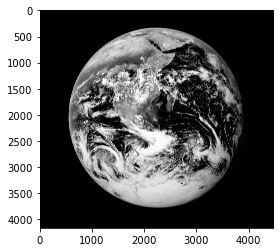

In [3]:
tierra_file='Tierra.jpg'
tierra_orig = imread(tierra_file,format='jpg')# Imagen Tierra original, 3 canales
tierra_matrix=np.mean(tierra_orig,-1)# Promedia la intensidad de todos los canales.

# Se imprime la imágen original en escala de grises.
img=plt.imshow(tierra_matrix)
img.set_cmap('gray')
plt.show()

In [ ]:

# Arma la descomposicion
U, S, VT=np.linalg.svd(tierra_matrix) # Se calcula la SVD de la matriz con la que estamos trabajando.
S=np.diag(S) # Construye matriz Sigma

In [46]:
# Proceso de reduccion/compresion

# Se seleccióna cuántos valores singulares se toman para reconstruir la imágen.
reduccion_container = []
sizeOrig=os.stat(tierra_file).st_size # Size de la imagen original

for k in range(1,1001,1):
    Tierra_red = U[:,:k] @ S[0:k,:k] @ VT[:k,:] # Recompone la imágen usando los k valores singulares seleccionados.
    file_red = os.getcwd() + '\\file_red.jpeg' # Filepath para el nuevo archivo
    imsave(file_red,Tierra_red,cmap="gray") # Guarda imagen
    
    # Esto es para comparar los tamaños de los archvos y ver cuánto se redujo.
    sizeRed=os.stat(file_red).st_size # Tam. imagen reducida.
    reduc=100*(sizeOrig-sizeRed)/sizeOrig # Porcentaje de reducción.
    reduccion_container.append(reduc) # Agrego el % de reduccion a la lista
    

Imágenes generadas con k= 0, 25, 50, 75 y 100 

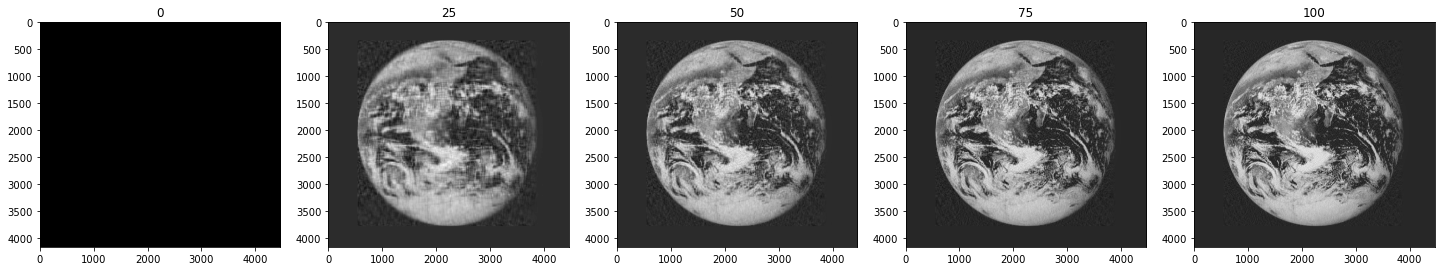

In [130]:
f, ax = plt.subplots(ncols=5,nrows=1,figsize=(25,10))
for k in range(0,101,25):
    Tierra_red = U[:,:k] @ S[0:k,:k] @ VT[:k,:] # Recompone la imágen usando los k valores singulares seleccionados.
    index = k//25
    #if index != 0:
    ax[index].imshow(Tierra_red,cmap='gray')
    ax[index].set_title(index*25)
plt.show()

In [50]:
# Guarado el contenedor para no tener que correr si hiciera falta recuperar los datos
#np.savetxt(fname=os.getcwd()+'\\reducciones_tierra.csv',X=reduccion_container,delimiter=';')

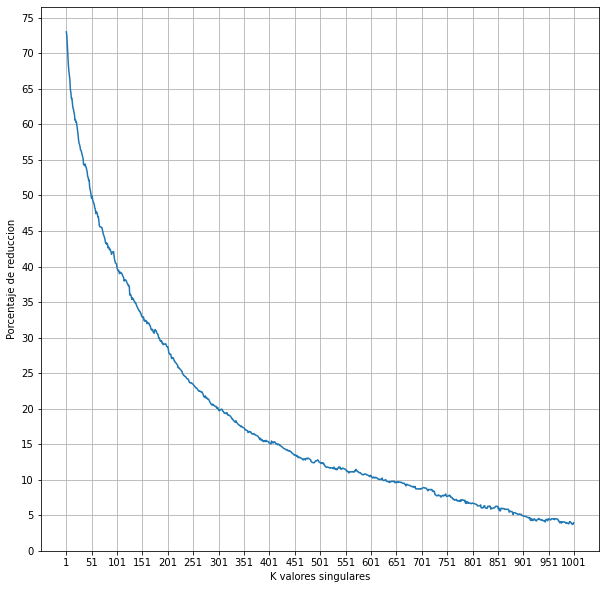

In [59]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,1001,1),reduccion_container)
ax.set_yticks(range(0,76,5))
ax.set_xticks(range(1,1002,50))
ax.grid()
ax.set_ylabel('Porcentaje de reduccion')
ax.set_xlabel('K valores singulares')
plt.show()

La imagen de arriba nos permite ver como la reducción no se comporta de manera lineal, sino que los primeros valores singulares codifican una gran parte de la información. 

En el loop se tomaron los primeros 1000 valores, y llevó un tiempo de ejecución considerable.(No medido exacto, pero cerca de 40 minutos).

Vemos que estos primeros 1000 valores representan poco más del 95% del peso de la imagen, siendo el cerca del 25% del total de los valores de la matriz S.

En particular, es interesante el comportamiento al comienzo, para k entre 1 y 101 o 151, vemos que la pendiente es muy pronunciada, es decir, cada valor singular adicional que estamos considerando está agregando una cantidad significativa de información al archivo, volviéndolo más y más pesado, acercándolo al archivo original (que sería en el límite de k=4163 y la compresión del 0%, ya que sería el archivo completo). 

# Tango

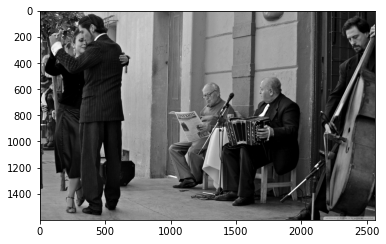

In [5]:
tango_file='tango.jpg'
tango_orig = imread(tango_file,format='jpg') # Imagen original
tango_matrix=np.mean(tango_orig,-1)# Promedio RGB.


# Se imprime la imágen.
img=plt.imshow(tango_matrix)
img.set_cmap('gray')
plt.show()

In [63]:

# Arma la descomposicion

U_tango, S_tango, VT_tango=np.linalg.svd(tango_matrix) # Se calcula la SVD de la matriz con la que estamos trabajando.
S_tango=np.diag(S_tango) # La SVD devuelve los valores singulares y acá construimos la matriz Sigma.

In [ ]:
# Proceso de reduccion/compresion

# Se seleccióna cuántos valores singulares se toman para reconstruir la imágen.
reduccion_container_tango = []
sizeOrig_tango=os.stat(tango_file).st_size # Size de la imagen original

for k in range(1,1001,1):
    Tango_red = U_tango[:,:k] @ S_tango[0:k,:k] @ VT_tango[:k,:] # Recompone la imágen usando los k valores singulares seleccionados.
    file_red_tango = os.getcwd() + '\\tango_red.jpeg' # Filepath para el nuevo archivo
    imsave(file_red_tango,Tango_red,cmap="gray") # Guarda imagen
    
    # Esto es para comparar los tamaños de los archvos y ver cuánto se redujo.
    sizeRed=os.stat(file_red_tango).st_size # Tam. imagen reducida.
    reduc=100*(sizeOrig_tango-sizeRed)/sizeOrig_tango # Porcentaje de reducción.
    reduccion_container_tango.append(reduc) # Agrego el % de reduccion a la lista
    #print(k)

    


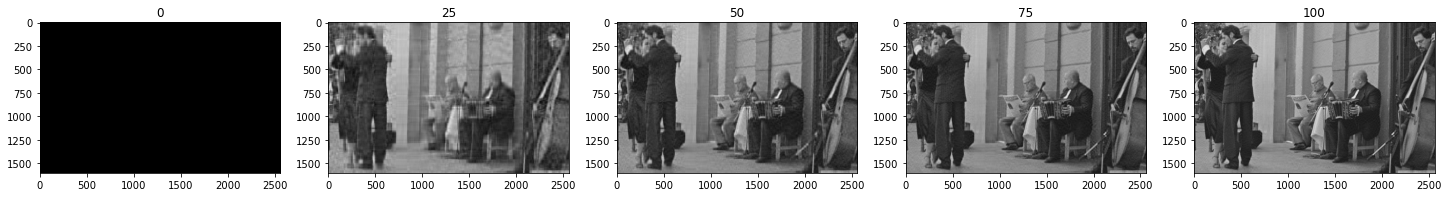

In [131]:
f, ax = plt.subplots(ncols=5,nrows=1,figsize=(25,10))
for k in range(0,101,25):
    Tango_red = U_tango[:,:k] @ S_tango[0:k,:k] @ VT_tango[:k,:] # Recompone la imágen usando los k valores singulares seleccionados.
    index = k//25
    ax[index].imshow(Tango_red,cmap='gray')
    ax[index].set_title(index*25)
plt.show()

In [71]:
# Guardo el contenedor para no tener que correr si hiciera falta recuperar los datos
#np.savetxt(os.getcwd()+'\\reduccion_tango.csv',reduccion_container_tango,delimiter=';')

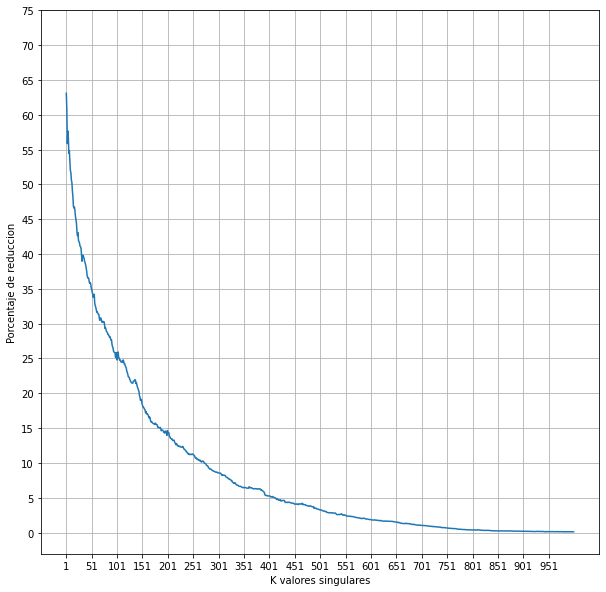

In [72]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,1001,1),reduccion_container_tango)
ax.set_yticks(range(0,76,5))
ax.set_xticks(range(1,1001,50))
ax.grid()
ax.set_ylabel('Porcentaje de reduccion')
ax.set_xlabel('K valores singulares')
plt.show()

# Comparacion

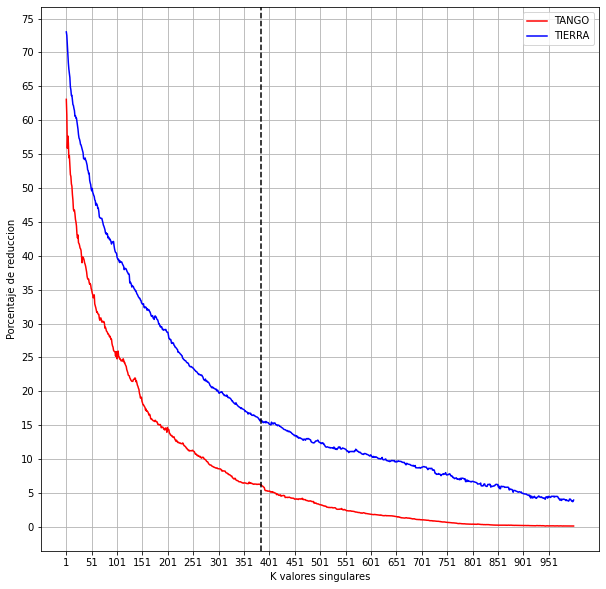

In [83]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,1001,1),reduccion_container_tango,color='red',label='TANGO')
ax.plot(range(1,1001,1),reduccion_container,color='blue',label='TIERRA')
ax.set_yticks(range(0,76,5))
ax.set_xticks(range(1,1001,50))
ax.grid()
ax.set_ylabel('Porcentaje de reduccion')
ax.set_xlabel('K valores singulares')
ax.axvline(x=384,color='k',ls='--')

plt.legend()
plt.show()

Si nos apuramos, parece que la imagen de Tango tiene una pendiente aún mayor y la imagen tiene la información más concentrada en los primeros Valores Singulares, pero esa sería una **conclusión incorrecta** ya que las dimensiones de las imágenes son diferentes.

1000 SV representan 24% de la Tierra, mientras que 62.5% de Tango.

El 24% de los SV de tango serían 384 valores (línea vertical discontinua), donde la reduccion es de 6.119%, siendo un valor mayor al 3.94% de Tierra en k=1000 (su equivalente al 24% mecionado). La diferencia ahora es pequeña, y atribuible a la naturaleza de las imágenes.

Es decir, si tomamos aprox. 1/4 de los primeros SV de Tierra contienen mayor información respecto de la imagen original, comparado con los de Tango, lo que resulta en un nivel de compresión menor.

De todos modos, puede verse que el **comportamiento sigue siendo similar**, donde la mayor parte de la información de la imagen está concentrada en una porción reducida de sus Valores Singulares, mientras que el $\sim$75% restante aporta incrementos muy pequeños de información.

Las diferencias en el gráfico se deben en parte a la diferencia de escala entre las dos imágenes, así como a las características propias de las matrices que representan esas imágenes.